# task 1

In [5]:
import pandas as pd
import os

In [6]:
Folder_Path = r'C:/Users/dell/Documents/python/indeed_scraped_data 2/indeed_scraped_data/job_url_data'          
SaveFile_Path =  r'C:/Users/dell/Documents/python/indeed_scraped_data 2/indeed_scraped_data/job_url_data'       
SaveFile_Name = r'job_url_data_combine.csv'              
os.chdir(Folder_Path)
file_list = os.listdir()
df = pd.read_csv(Folder_Path +'\\'+ file_list[0])  

df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False)

In [7]:
for i in range(1,len(file_list)):
    df = pd.read_csv(Folder_Path + '\\'+ file_list[i])
    df['date']=file_list[i].split('_')[-2]
    df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')

In [8]:
url=pd.read_csv('job_url_data_combine.csv')

In [9]:
url = url.rename_axis('URL').reset_index()

In [10]:
url.columns=["URL","date"]

In [11]:
url_earliest=url.drop_duplicates(subset='URL', keep='first')

In [12]:
url_dic = url_earliest.set_index('URL').T.to_dict('list')

In [13]:
import json

In [14]:
with open('Task 1 result.json','w') as fp:
    json.dump(url_dic,fp)

In [15]:
print("The number of unique job urls collected between May 17, 2022 and May 23, 2022 is:",len(url_earliest.URL))

The number of unique job urls collected between May 17, 2022 and May 23, 2022 is: 21260


# task 2

In [16]:
path1 = "C:/Users/dell/Documents/python/indeed_scraped_data 2/indeed_scraped_data/job_info_data"            

path2 = "C:/Users/dell/Documents/python/indeed_scraped_data 2/indeed_scraped_data/job_info_data2"     
if not os.path.exists(path2):
    os.mkdir(path2)


In [17]:
df = pd.DataFrame()
for filename in os.listdir(path1):
   
    if filename.endswith(".csv"):
        file_path1 = path1 + "/" + filename
        df1 = pd.read_csv(file_path1, usecols=['lnks_link', 'lnks_job_title', 'lnks_company',
                  'lnks_company_url', 'lnks_company_location', 
                   'lnks_job_description'])
        df = pd.concat([df, df1])

df = df.reset_index(drop=True)
df.to_csv(path2 + "/" + "combine.csv", index=False)
        
print("finish！")

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


finish！


In [18]:
json_df1 = pd.read_json("C:/Users/dell/Documents/python/parsehub_5202022_v2.json")
json_df2 = pd.read_json("C:/Users/dell/Documents/python/parsehub_5182022_v2.json")
df2=df.rename(columns={'lnks_link':'lnks'})
all_job_info_data = pd.concat([df2,json_df1,json_df2],axis=0) 

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [19]:
all_job_info_data=all_job_info_data.dropna(axis=0, how='any', thresh=None, subset=['lnks_job_title'], inplace=False)
all_job_info_data=all_job_info_data.dropna(axis=0, how='all', thresh=None, subset=['lnks'], inplace=False)

In [20]:
all_job_info_data=all_job_info_data.drop_duplicates(subset=['lnks'], keep='first', inplace=False)

In [21]:
all_job_info_data.to_csv('task 2 clean data.csv')

In [22]:
print(' The number of unique jobs in the cleaned dataframe is :', len(all_job_info_data['lnks_job_description']))

 The number of unique jobs in the cleaned dataframe is : 13946


# task 3

In [23]:
all_job_info_data

,lnks,lnks_company,lnks_company_location,lnks_company_url,lnks_job_description,lnks_job_title
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,USAA,"Happy Valley Ranch, AZ",https://www.indeed.com/cmp/Usaa?campaignid=mob...,Purpose of Job We are seeking a talented Senio...,Senior Audit Manager- Compliance (Remote)
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,Pikes Peak Community College,"Colorado Springs, CO 80906",https://www.indeed.com/cmp/Pikes-Peak-Communit...,Tracking Code: 40069\nWork Type: Full-time\nCa...,Access Specialist
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,Memorial Regional Health,"Craig, CO 81625",https://www.indeed.com/cmp/Memorial-Regional-H...,Position Purpose: The Registered Nurse is resp...,Clinic Registered Nurse - Family Practice - FT
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,Jacobs,"Wethersfield, CT 06109",https://www.indeed.com/cmp/Jacobs?campaignid=m...,Our People & Places Solutions business – reinf...,Sr Wetland Scientist/Permitting Specialist
4,https://www.indeed.com/company/Swiss-American-...,Swiss American CDMO,"Carrollton, TX 75006",https://www.indeed.com/cmp/Swiss-American-Cdmo...,QUALITY ASSURANCE ENGINEER II\nPosition Summar...,Quality Assurance Engineer
...,...,...,...,...,...,...
30374,https://www.indeed.com/rc/clk?jk=b07d1f89502f6...,"USIC, LLC","Indianapolis, IN 46201",https://www.indeed.com/cmp/Usic?campaignid=mob...,EQUIVALENTEXPERIENCE\nJob Description:\nPositi...,Director of Payroll
30375,https://www.indeed.com/rc/clk?jk=efd2df0a1f6ac...,NaN,"Saint Petersburg, FL",NaN,This is very responsible technical office and ...,Senior Plans Examiner
30376,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,United States,NaN,"The Senior Director, Quality Management Oversi...",Senior Director Quality Management Oversight
30377,https://www.indeed.com/rc/clk?jk=2acefe67ac561...,WALGREENS,"Mesa, AZ 85204",https://www.indeed.com/cmp/Walgreens?campaigni...,Opens and closes the store in the absence of s...,Shift Lead


In [24]:
url_earliest=url_earliest.rename(columns={'URL':'lnks'})
url_earliest

,lnks,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,5172022
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,5172022
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,5172022
4,https://www.indeed.com/company/Swiss-American-...,5172022
...,...,...
55707,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022
55708,https://www.indeed.com/rc/clk?jk=4c78c7807e27e...,5232022
55711,https://www.indeed.com/rc/clk?jk=0e8f96a6be975...,5232022
55712,https://www.indeed.com/rc/clk?jk=bd10340c8c24a...,5232022


In [25]:
df_merged=pd.merge(url_earliest,all_job_info_data,on=['lnks'],how='outer')
df_merged.to_csv("merged.csv")

In [26]:
print("The percentage of jobs that can be matched is:", 1-len(df_merged[df_merged['lnks_job_title'].isnull()])/len(df_merged['lnks']))
print("The percentage of jobs that can not be matched is:", len(df_merged[df_merged['lnks_job_title'].isnull()])/len(df_merged['lnks']))

The percentage of jobs that can be matched is: 0.6559736594543744
The percentage of jobs that can not be matched is: 0.3440263405456256


In [27]:
df_merged_match=df_merged[df_merged['lnks_job_title'].notnull()]
df_merged_unmatch=df_merged[df_merged['lnks_job_title'].isnull()]

In [28]:
df_merged_unmatch_hist=df_merged_unmatch.groupby(df_merged_unmatch['date']).count()
df_merged_unmatch_hist['date'] = df_merged_unmatch_hist.index
df_merged_unmatch_hist

,lnks,lnks_company,lnks_company_location,lnks_company_url,lnks_job_description,lnks_job_title,date
date,,,,,,,
5172022,2628,0,0,0,0,0,5172022
5182022,642,0,0,0,0,0,5182022
5192022,204,0,0,0,0,0,5192022
5202022,126,0,0,0,0,0,5202022
5212022,179,0,0,0,0,0,5212022
5222022,112,0,0,0,0,0,5222022
5232022,3423,0,0,0,0,0,5232022


In [29]:
df_merged_match_hist=df_merged_match.groupby(df_merged_match['date']).count()

In [30]:
df_merged_match_hist=df_merged_match_hist.reset_index()
df_merged_match_hist

,date,lnks,lnks_company,lnks_company_location,lnks_company_url,lnks_job_description,lnks_job_title
0,5172022,2629,2229,2629,2229,2629,2629
1,5182022,683,646,683,646,683,683
2,5192022,3594,3205,3594,3205,3594,3594
3,5202022,4397,4079,4397,4079,4397,4397
4,5212022,1975,1609,1975,1609,1975,1975
5,5222022,668,519,668,519,668,668


In [31]:
import matplotlib.pyplot as plt
import numpy as np

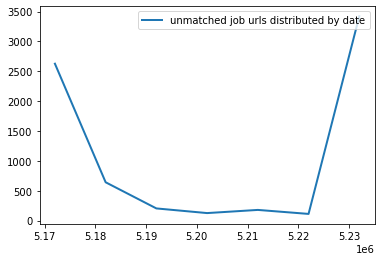

In [32]:
x = df_merged_unmatch_hist['date']
y = df_merged_unmatch_hist['lnks']
plt.plot(x,y,lw=2,label='unmatched job urls distributed by date')
plt.legend(loc=1)
plt.show()

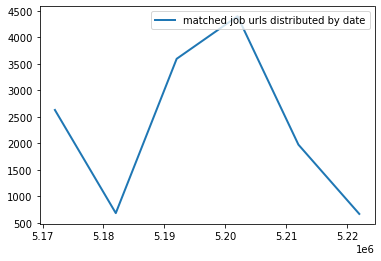

In [33]:
x = df_merged_match_hist['date']
y = df_merged_match_hist['lnks']
plt.plot(x,y,lw=2,label='matched job urls distributed by date')
plt.legend(loc=1)
plt.show()

In [34]:
print('Complete job listings able to collect each day is :',df_merged_match_hist[['date','lnks']])

Complete job listings able to collect each day is :       date  lnks
0  5172022  2629
1  5182022   683
2  5192022  3594
3  5202022  4397
4  5212022  1975
5  5222022   668


The percentage of jobs that can be matched is 66% and the data mismatch rate is very high at the beginning and end of the data collection. Non random sampling error exists. Due to the purposeful selection of compliance jobs, the principle of random sampling is broken, and the current error is not the overall error. In addition, some items have missing values due to data collection errors or table design deviations.

 # Bonus Task 1. 

In [41]:
df_merged_match['state']=df_merged_match['lnks_company_location'].apply(lambda x: x.split(',')[1][1:3] if len(x.split(','))>1 else x)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_merged_match

,lnks,date,lnks_company,lnks_company_location,lnks_company_url,lnks_job_description,lnks_job_title,state
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,USAA,"Happy Valley Ranch, AZ",https://www.indeed.com/cmp/Usaa?campaignid=mob...,Purpose of Job We are seeking a talented Senio...,Senior Audit Manager- Compliance (Remote),AZ
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,5172022,Pikes Peak Community College,"Colorado Springs, CO 80906",https://www.indeed.com/cmp/Pikes-Peak-Communit...,Tracking Code: 40069\nWork Type: Full-time\nCa...,Access Specialist,CO
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,5172022,Memorial Regional Health,"Craig, CO 81625",https://www.indeed.com/cmp/Memorial-Regional-H...,Position Purpose: The Registered Nurse is resp...,Clinic Registered Nurse - Family Practice - FT,CO
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,5172022,Jacobs,"Wethersfield, CT 06109",https://www.indeed.com/cmp/Jacobs?campaignid=m...,Our People & Places Solutions business – reinf...,Sr Wetland Scientist/Permitting Specialist,CT
4,https://www.indeed.com/company/Swiss-American-...,5172022,Swiss American CDMO,"Carrollton, TX 75006",https://www.indeed.com/cmp/Swiss-American-Cdmo...,QUALITY ASSURANCE ENGINEER II\nPosition Summar...,Quality Assurance Engineer,TX
...,...,...,...,...,...,...,...,...
17721,https://www.indeed.com/rc/clk?jk=e8a25ac711c8e...,5222022,NaN,"Augusta, GA 30904",NaN,Duties\nDuties include but are not limited to:...,Supervisory Medical Records Technician,GA
17722,https://www.indeed.com/rc/clk?jk=b07d1f89502f6...,5222022,"USIC, LLC","Indianapolis, IN 46201",https://www.indeed.com/cmp/Usic?campaignid=mob...,EQUIVALENTEXPERIENCE\nJob Description:\nPositi...,Director of Payroll,IN
17723,https://www.indeed.com/rc/clk?jk=efd2df0a1f6ac...,5222022,NaN,"Saint Petersburg, FL",NaN,This is very responsible technical office and ...,Senior Plans Examiner,FL
17724,https://www.indeed.com/rc/clk?jk=2acefe67ac561...,5222022,WALGREENS,"Mesa, AZ 85204",https://www.indeed.com/cmp/Walgreens?campaigni...,Opens and closes the store in the absence of s...,Shift Lead,AZ


In [47]:
job_count_by_state = df_merged_match.groupby('state').agg('lnks_job_title').count().reset_index()
job_count_by_state=job_count_by_state.rename(columns={'state':'STUSPS'})
job_count_by_state

,STUSPS,lnks_job_title
0,AK,43
1,AL,147
2,AR,81
3,AZ,324
4,Alabama,3
...,...,...
91,WV,55
92,WY,25
93,Washington State,6
94,West Virginia,1


In [2]:
import geopandas as gpd

In [3]:
state_gdf = gpd.read_file('C:/Users/dell/Documents/python/states/states.geojson')
print(state_gdf.shape)
print(state_gdf.columns)
state_gdf.head()

(51, 4)
Index(['STATEFP', 'STUSPS', 'NAME', 'geometry'], dtype='object')


,STATEFP,STUSPS,NAME,geometry
0,31,NE,Nebraska,"MULTIPOLYGON (((-104.05303 43.00059, -103.6183..."
1,53,WA,Washington,"MULTIPOLYGON (((-122.52603 47.35891, -122.5139..."
2,35,NM,New Mexico,"MULTIPOLYGON (((-109.04522 36.99908, -108.6460..."
3,46,SD,South Dakota,"MULTIPOLYGON (((-104.05770 44.99743, -104.0397..."
4,21,KY,Kentucky,"MULTIPOLYGON (((-89.13268 36.98220, -89.16645 ..."


In [49]:
job_count_gdf = state_gdf[['STUSPS', 'geometry']].merge(job_count_by_state, how='inner', on='STUSPS')
job_count_gdf 

,STUSPS,geometry,lnks_job_title
0,NE,"MULTIPOLYGON (((-104.05303 43.00059, -103.6183...",102
1,WA,"MULTIPOLYGON (((-122.52603 47.35891, -122.5139...",290
2,NM,"MULTIPOLYGON (((-109.04522 36.99908, -108.6460...",125
3,SD,"MULTIPOLYGON (((-104.05770 44.99743, -104.0397...",45
4,KY,"MULTIPOLYGON (((-89.13268 36.98220, -89.16645 ...",158
5,GA,"MULTIPOLYGON (((-85.60516 34.98468, -85.38497 ...",342
6,AR,"MULTIPOLYGON (((-89.73310 36.00061, -89.71456 ...",81
7,PA,"MULTIPOLYGON (((-80.51942 41.97752, -80.32998 ...",535
8,MS,"MULTIPOLYGON (((-91.16607 33.00411, -91.12566 ...",90
9,CO,"MULTIPOLYGON (((-109.05008 41.00066, -108.8841...",357


In [51]:
import folium

In [59]:
m = folium.Map( zoom_start=11, width=800, height=400, tiles="Cartodb Positron")

folium.Choropleth(
    geo_data=job_count_gdf,
    name="choropleth",
    data=job_count_gdf,
    columns= ["STUSPS","lnks_job_title"],
    key_on="feature.properties.STUSPS",
    fill_color="YlGn", #‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="the spatial distribution of compliance jobs").add_to(m)

folium.LayerControl().add_to(m)
display(m)